#### Importación de librerías.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as pl
import scipy as sp
import itertools as it

#### Apertura y resumen del dataset.
En parquet, debido a que se hizo en la taréa anterior.

In [46]:
df = pd.read_parquet("GRD_2023_DESCRIPTIVE.parquet", engine="pyarrow")

df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1038754 entries, 0 to 1039586
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COD_HOSPITAL         1038754 non-null  int64  
 1   CIP_ENCRIPTADO       1037121 non-null  float64
 2   SEXO                 1038715 non-null  object 
 3   FECHA_NACIMIENTO     1038744 non-null  object 
 4   SERVICIO_SALUD       1038013 non-null  object 
 5   TIPO_INGRESO         1038699 non-null  object 
 6   FECHA_INGRESO        1038754 non-null  object 
 7   FECHAALTA            1038754 non-null  object 
 8   TIPOALTA             1038754 non-null  object 
 9   DIAGNOSTICO1         1038754 non-null  object 
 10  IR_29301_COD_GRD     1038754 non-null  float64
 11  IR_29301_PESO        1038754 non-null  float64
 12  IR_29301_SEVERIDAD   1038754 non-null  float64
 13  IR_29301_MORTALIDAD  1038754 non-null  float64
 14  EDAD                 1038744 non-null  float64
 15  DIA

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,...,EDAD,DIAS_ESTANCIA,HOSPITAL,Versión,Descripción,Categoría,Sección,Capítulo,DESCRIPCION_GRD,peso_categoria
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,...,43.0,2,Hospital Clínico Regional (Valdivia),CIE-v2013,Apendicitis aguda con peritonitis localizada,K35 APENDICITIS AGUDA,K35-K38 ENFERMEDADES DEL APÉNDICE,Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...,MH INFECCIONES GASTROINTESTINALES MAYORES,Medio-Bajo
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,...,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Otros tipos de neumotórax espontáneo,J93 NEUMOTÓRAX,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,Medio
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,...,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Neumonía debida a virus sincitial respiratorio,"J12 NEUMONÍA VIRAL, NO CLASIFICADA EN OTRA PARTE",J09-J18 GRIPE Y NEUMONÍA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,MH NEUMONÍA SIMPLE Y TOS FERINA,Bajo
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,...,45.0,1,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Incontinencia urinaria por tensión,N39 OTROS TRASTORNOS DEL SISTEMA URINARIO,N30-N39 OTRAS ENFERMEDADES DEL APARATO URINARIO,Cap.14 ENFERMEDADES DEL APARATO GENITOURINARI...,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,Medio-Bajo
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,...,0.0,2,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Ictericia no especificada,R17 ICTERICIA NO ESPECIFICADA,R10-R19 SÍNTOMAS Y SIGNOS QUE AFECTAN AL APAR...,"Cap.18 SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALE...","MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",Medio-Bajo


### Eliminar columnas que no se consideran necesarias. (O repetitivas).
Entre ellas:
- Versión
- IR_29301_PESO
- IR_29301_COD_GRD
- COD_HOSPITAL
- FECHA_NACIMIENTO

In [47]:
out = ["Versión", 'IR_29301_PESO', 'IR_29301_COD_GRD', 'COD_HOSPITAL', 'FECHA_NACIMIENTO']
df = df.drop(out, axis=1)
df

,CIP_ENCRIPTADO,SEXO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,Descripción,Categoría,Sección,Capítulo,DESCRIPCION_GRD,peso_categoria
0,72196813.0,HOMBRE,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia),Apendicitis aguda con peritonitis localizada,K35 APENDICITIS AGUDA,K35-K38 ENFERMEDADES DEL APÉNDICE,Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...,MH INFECCIONES GASTROINTESTINALES MAYORES,Medio-Bajo
1,NaN,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,Otros tipos de neumotórax espontáneo,J93 NEUMOTÓRAX,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,Medio
2,97627974.0,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,Neumonía debida a virus sincitial respiratorio,"J12 NEUMONÍA VIRAL, NO CLASIFICADA EN OTRA PARTE",J09-J18 GRIPE Y NEUMONÍA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,MH NEUMONÍA SIMPLE Y TOS FERINA,Bajo
3,67770674.0,MUJER,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio),Incontinencia urinaria por tensión,N39 OTROS TRASTORNOS DEL SISTEMA URINARIO,N30-N39 OTRAS ENFERMEDADES DEL APARATO URINARIO,Cap.14 ENFERMEDADES DEL APARATO GENITOURINARI...,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,Medio-Bajo
4,100390800.0,MUJER,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio),Ictericia no especificada,R17 ICTERICIA NO ESPECIFICADA,R10-R19 SÍNTOMAS Y SIGNOS QUE AFECTAN AL APAR...,"Cap.18 SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALE...","MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",Medio-Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,78111817.0,MUJER,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,O03.1,1.0,1.0,27.0,3,Hospital Dr. Antonio Tirado Lanas (Ovalle),"Aborto espontáneo, incompleto, complicado por ...",O03 ABORTO ESPONTÁNEO,O00-O08 EMBARAZO CON RESULTADO ABORTIVO,"Cap.15 EMBARAZO, PARTO Y PUERPERIO (O00-O9A)","PH PROCEDIMIENTOS SOBRE ÚTERO Y CUELLO, DILAT...",Medio-Bajo
1039583,76593606.0,MUJER,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,N87.1,0.0,0.0,32.0,0,Hospital Clínico Regional Dr. Guillermo Grant...,Displasia cervical moderada,N87 DISPLASIA DEL CUELLO UTERINO,N80-N98 TRASTORNOS NO INFLAMATORIOS DEL TRACT...,Cap.14 ENFERMEDADES DEL APARATO GENITOURINARI...,PA OTROS PROCEDIMIENTOS GINECOLÓGICOS,Muy Bajo
1039584,100360940.0,HOMBRE,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,K35.8,1.0,1.0,9.0,2,Hospital Regional de Rancagua,"Apendicitis aguda, otra y no especificada",K35 APENDICITIS AGUDA,K35-K38 ENFERMEDADES DEL APÉNDICE,Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...,PH PROCEDIMIENTOS SOBRE APÉNDICE,Medio-Bajo
1039585,78557002.0,HOMBRE,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,J45.0,1.0,1.0,9.0,0,Hospital Base San José de Osorno,Asma predominantemente alérgica,J45 ASMA,J40-J47 ENFERMEDADES CRÓNICAS DEL TRACTO RESP...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,MH BRONQUIOLITIS Y ASMA,Bajo


### Análisis variable objetivo (Días estancia)


In [ ]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              0
10%:                 0.0
25%:                 1.0
Mediana:             2.0
75%:                 6.0
90%:                 14.0
Máximo:              696
Promedio:            5.8
Desviación Estandar: 12.35

---------------------------------------------------------------------------



#### Debido a la diferencia entre el percentil 90 y el máximo, se realiza un análisis más profundo.

In [ ]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA:')
print('\n---------------------------------------------------------------------------\n')
print(f'91%:                 {np.nanpercentile(array, 91)}')
print(f'92%:                 {np.nanpercentile(array, 92)}')
print(f'93%:                 {np.nanpercentile(array, 93)}')
print(f'94%:                 {np.nanpercentile(array, 94)}')
print(f'95%:                 {np.nanpercentile(array, 95)}')
print(f'96%:                 {np.nanpercentile(array, 96)}')
print(f'97%:                 {np.nanpercentile(array, 97)}')
print(f'98%:                 {np.nanpercentile(array, 98)}')
print(f'99%:                 {np.nanpercentile(array, 99)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA:

---------------------------------------------------------------------------

91%:                 15.0
92%:                 16.0
93%:                 18.0
94%:                 20.0
95%:                 22.0
96%:                 25.0
97%:                 30.0
98%:                 37.0
99%:                 53.0

---------------------------------------------------------------------------



### Limpieza segun recomendaciones
Como se ve anteriormente, el último 9% de los días de estancia comienza a dispararse, por ende, se considerarán outliers y se eliminaran. Además, debido a que nuestro objetivo es predecir los días de estancia, no se considerarán consultas ambulatorias (0 días de estancia).

In [ ]:
# Quitar días de estancia = 0 ó días de estancia > 15.
df = df[(df['DIAS_ESTANCIA'] > 0) & (df['DIAS_ESTANCIA'] <= 15)]
len(df)

728526

# Cambiar de orden
#### Generar nuevamente las métricas principales.

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              1
10%:                 1.0
25%:                 2.0
Mediana:             3.0
75%:                 6.0
90%:                 10.0
Máximo:              15
Promedio:            4.27
Desviación Estandar: 3.41

---------------------------------------------------------------------------




### Manejo de nulos

In [ ]:
for var in df.columns:
    if df[var].isnull().sum() > 0:
        print(f'Variable: {var}')
        print(f'Número de nulos: {df[var].isnull().sum()}')
        print(f'Porcentaje de nulos: {round((df[var].isnull().sum()/len(df))*100, 2)}%')
        print('\n---------------------------------------------------------------------------\n')

Variable: CIP_ENCRIPTADO
Número de nulos: 1341
Porcentaje de nulos: 0.18%

---------------------------------------------------------------------------

Variable: SEXO
Número de nulos: 29
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: FECHA_NACIMIENTO
Número de nulos: 4
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: SERVICIO_SALUD
Número de nulos: 633
Porcentaje de nulos: 0.09%

---------------------------------------------------------------------------

Variable: TIPO_INGRESO
Número de nulos: 42
Porcentaje de nulos: 0.01%

---------------------------------------------------------------------------

Variable: EDAD
Número de nulos: 4
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: Versión
Número de nulos: 30
Porcentaje de nulos: 0.0%

---------------------------------------------------------

#### Debido a que la cantidad de nulos es menos de un 1% por variable, se eliminan sin generar un cambio significativo.

In [ ]:
df.dropna(inplace=True)
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 726448 entries, 0 to 1039586
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   COD_HOSPITAL         726448 non-null  int64  
 1   CIP_ENCRIPTADO       726448 non-null  float64
 2   SEXO                 726448 non-null  object 
 3   FECHA_NACIMIENTO     726448 non-null  object 
 4   SERVICIO_SALUD       726448 non-null  object 
 5   TIPO_INGRESO         726448 non-null  object 
 6   FECHA_INGRESO        726448 non-null  object 
 7   FECHAALTA            726448 non-null  object 
 8   TIPOALTA             726448 non-null  object 
 9   DIAGNOSTICO1         726448 non-null  object 
 10  IR_29301_COD_GRD     726448 non-null  float64
 11  IR_29301_PESO        726448 non-null  float64
 12  IR_29301_SEVERIDAD   726448 non-null  float64
 13  IR_29301_MORTALIDAD  726448 non-null  float64
 14  EDAD                 726448 non-null  float64
 15  DIAS_ESTANCIA        

### Filtrar por la región metropolitana

In [ ]:
df = df[df["SERVICIO_SALUD"].str.contains("METROPOLITANO")]
df

### Agrupación de edades (creación de grupos etarios)
Con las siguientes categorías (respectoa las edades):
- Infante (< 1)
- Niño (de 1 a 11)
- Adolescente (12 a 17)
- Adulto Joven (18 a 29)
- Adulto (30 a 64)
- Adulto Mayor (>65)

In [ ]:
def clasificar_edad(edad):
    if edad < 1:
        return "Infante"
    elif 1 <= edad <= 11:
        return "Niño"
    elif 12 <= edad <= 17:
        return "Adolescente"
    elif 18 <= edad <= 29:
        return "Adulto"
    elif 30 <= edad <= 64:
        return "Adulto"
    else:
        return "Adulto mayor"

df["Grupo Etario"] = df["EDAD"].apply(clasificar_edad)

# Exportación a parquet, para futuros análisis.
df.to_parquet("GRD_2023_DESCRIPTIVE_CLEAN.parquet", engine="pyarrow", index=False)
# df.to_csv("GRD_2023_DESCRIPTIVE_CLEAN.csv", index=False)

## Análisis profundo de las variables.
#### Métricas principales de las 3 variables elegidas.
- DIAS_ESTANCIA (Variable Objetivo)
- IR_29031_SEVERIDAD
- IR_29031_MORTALIDAD

1. DIAS_ESTANCIA (De nuevo, por la eliminación de outliers).

In [ ]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

2. IR_29031_SEVERIDAD

3. IR_29031_MORTALIDAD

#### Correlaciones de las variables.
Para un mejor entendimeinto de los comportamientos y las relaciones, además de apoyar en la decision de las 3 variables más importantes.

In [ ]:

df_copy = df.copy()
obj = []
num = []
for i in df_copy.columns:
    if df_copy[i].dtype == "object":
        obj.append(i)
        df_copy[i] = pd.Categorical(df_copy[i])
    else:
        num.append(i)

df_copy_cat = df_copy[obj]
obj2 = obj

cat_var_prod = list(it.product(obj, obj2, repeat=1))
cat_var_prod


# fig = plt.figure(figsize=(20,20))
# sns.heatmap(correlations, annot = True, cmap="coolwarm")

[('SEXO', 'SEXO'),
 ('SEXO', 'FECHA_NACIMIENTO'),
 ('SEXO', 'SERVICIO_SALUD'),
 ('SEXO', 'TIPO_INGRESO'),
 ('SEXO', 'FECHA_INGRESO'),
 ('SEXO', 'FECHAALTA'),
 ('SEXO', 'TIPOALTA'),
 ('SEXO', 'DIAGNOSTICO1'),
 ('SEXO', 'HOSPITAL'),
 ('SEXO', 'Versión'),
 ('SEXO', 'Descripción'),
 ('SEXO', 'Categoría'),
 ('SEXO', 'Sección'),
 ('SEXO', 'Capítulo'),
 ('SEXO', 'DESCRIPCION_GRD'),
 ('SEXO', 'peso_categoria'),
 ('FECHA_NACIMIENTO', 'SEXO'),
 ('FECHA_NACIMIENTO', 'FECHA_NACIMIENTO'),
 ('FECHA_NACIMIENTO', 'SERVICIO_SALUD'),
 ('FECHA_NACIMIENTO', 'TIPO_INGRESO'),
 ('FECHA_NACIMIENTO', 'FECHA_INGRESO'),
 ('FECHA_NACIMIENTO', 'FECHAALTA'),
 ('FECHA_NACIMIENTO', 'TIPOALTA'),
 ('FECHA_NACIMIENTO', 'DIAGNOSTICO1'),
 ('FECHA_NACIMIENTO', 'HOSPITAL'),
 ('FECHA_NACIMIENTO', 'Versión'),
 ('FECHA_NACIMIENTO', 'Descripción'),
 ('FECHA_NACIMIENTO', 'Categoría'),
 ('FECHA_NACIMIENTO', 'Sección'),
 ('FECHA_NACIMIENTO', 'Capítulo'),
 ('FECHA_NACIMIENTO', 'DESCRIPCION_GRD'),
 ('FECHA_NACIMIENTO', 'peso_categor

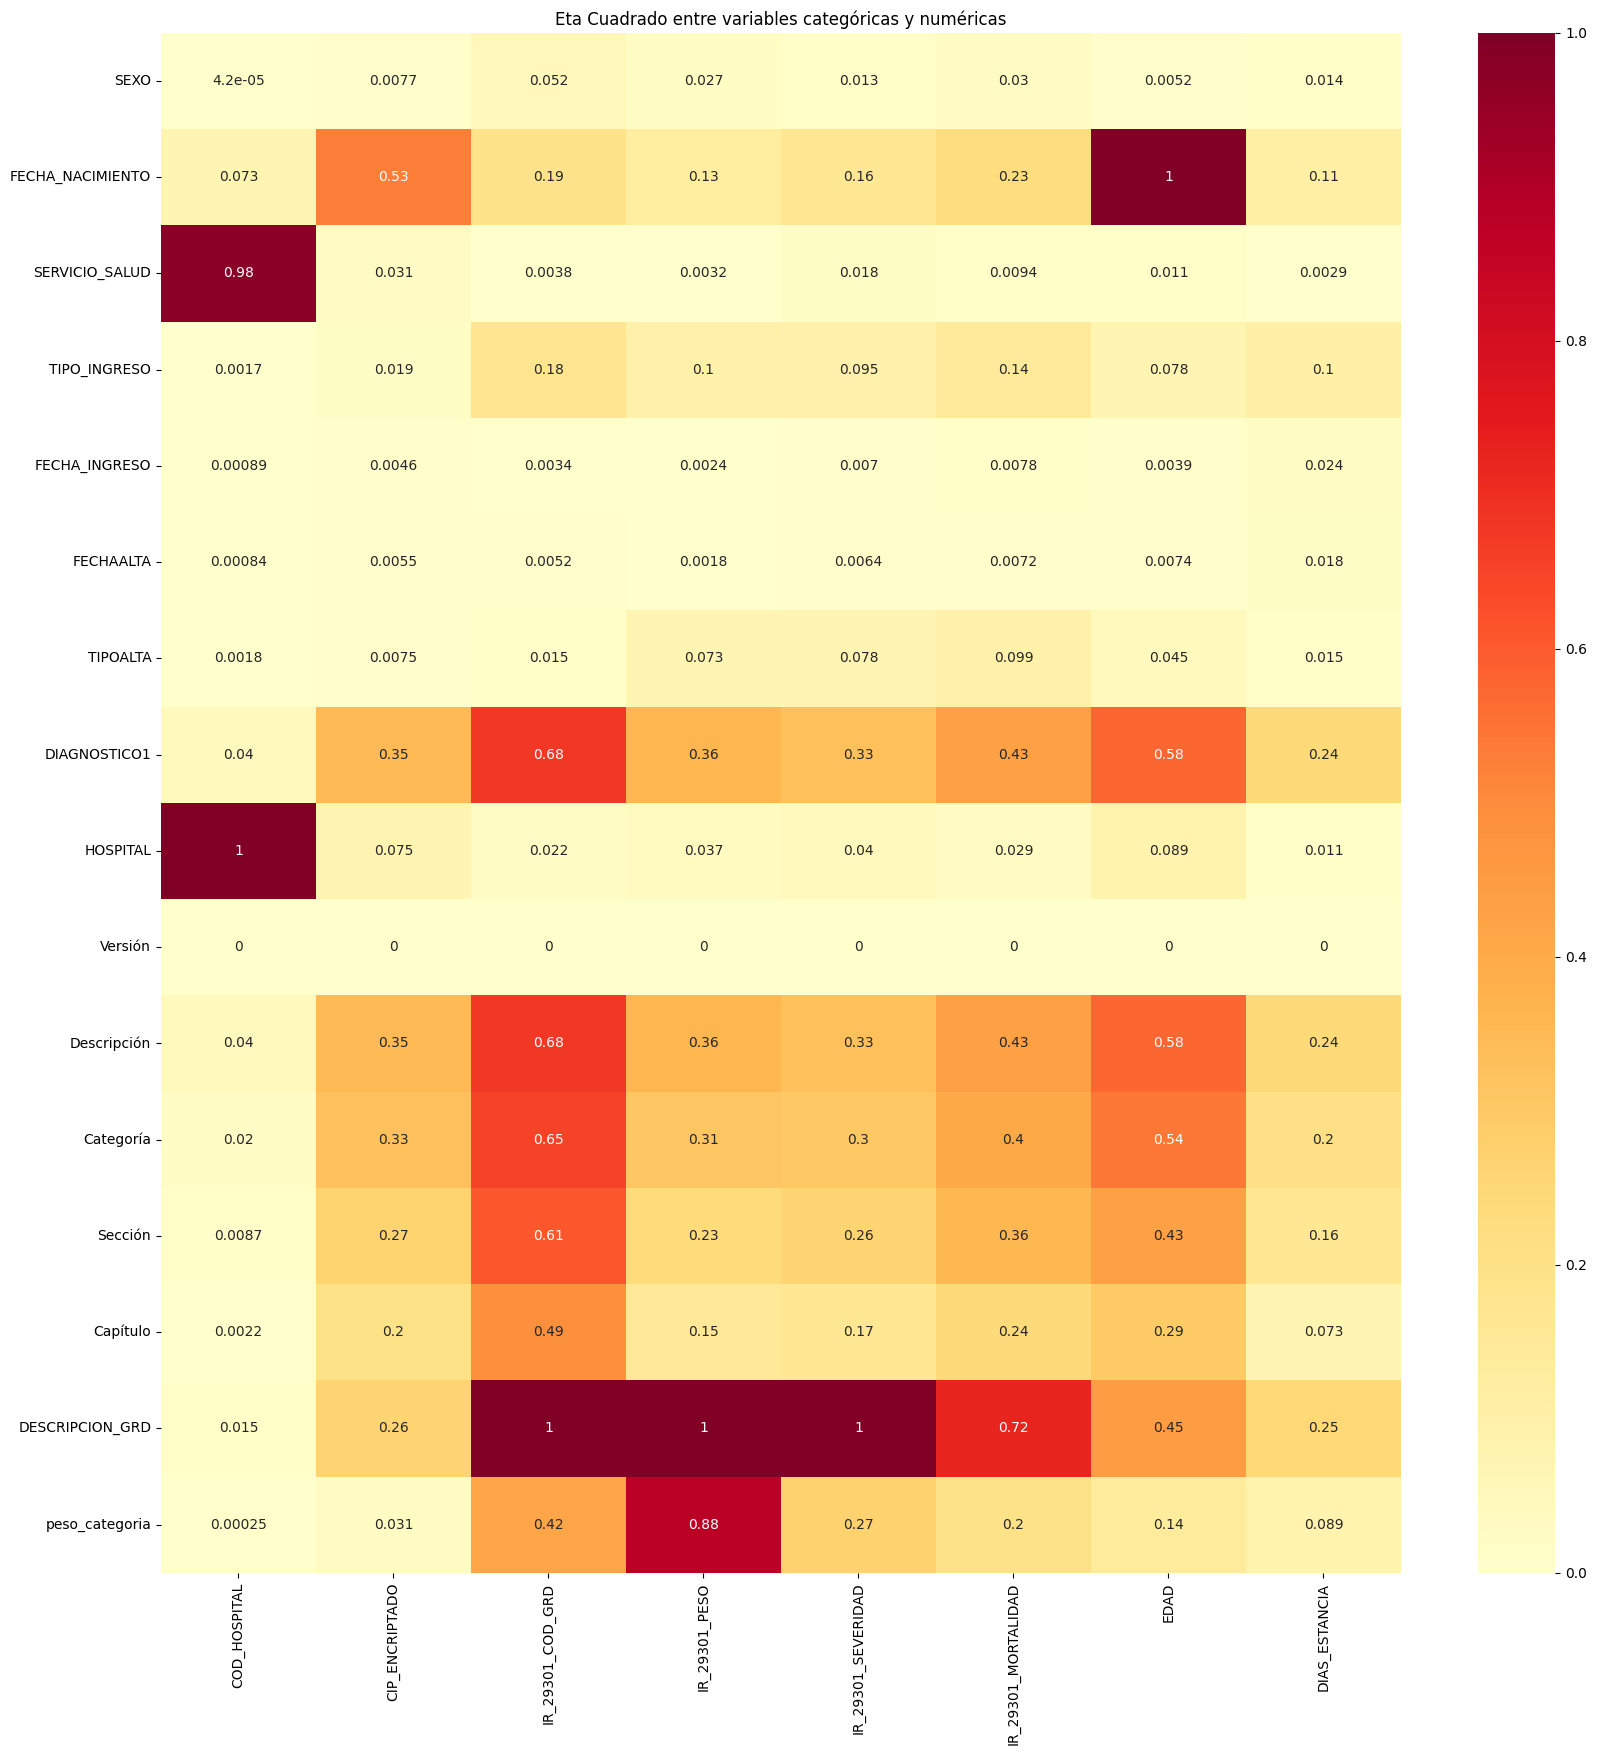

In [ ]:
def eta_squared(df, num_col, cat_col):
    categories = df[cat_col].unique()
    grand_mean = df[num_col].mean()
    ss_between = sum(
        len(df[df[cat_col] == cat]) * (df[df[cat_col] == cat][num_col].mean() - grand_mean) ** 2
        for cat in categories
    )
    ss_total = sum((df[num_col] - grand_mean) ** 2)
    return ss_between / ss_total

corr_matrix = pd.DataFrame(index = obj, columns = num)

for i in obj:
    for j in num:
        eta = eta_squared(df_copy, j, i)
        corr_matrix.loc[i, j] = eta

corr_matrix = corr_matrix.astype(float)
corr_matrix = corr_matrix.fillna(0)

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Eta Cuadrado entre variables categóricas y numéricas")
plt.show()